In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [34]:
tickers = ['HEX-USD', 'PLSD-USD']

In [35]:
weights = [0.95, 0.05]

In [36]:
price_data = web.get_data_yahoo(tickers,
                                start = '2019-12-05',
                                end = '2022-10-12').dropna()
price_data.head()

Attributes Adj Close               Close                High            \
Symbols      HEX-USD  PLSD-USD   HEX-USD  PLSD-USD   HEX-USD  PLSD-USD   
Date                                                                     
2022-08-07  0.051204  8.419267  0.051204  8.419267  0.051631  8.671531   
2022-08-08  0.052820  7.146456  0.052820  7.146456  0.055531  8.468697   
2022-08-09  0.054973  7.453550  0.054973  7.453550  0.057197  7.453567   
2022-08-10  0.059234  8.281947  0.059234  8.281947  0.059686  8.391620   
2022-08-11  0.060315  7.706560  0.060315  7.706560  0.063157  8.544893   

Attributes       Low                Open                Volume             
Symbols      HEX-USD  PLSD-USD   HEX-USD  PLSD-USD     HEX-USD   PLSD-USD  
Date                                                                       
2022-08-07  0.049629  8.202662  0.051130  8.386912   7092839.0   754109.0  
2022-08-08  0.051204  5.921521  0.051204  8.419425  13328997.0  2478100.0  
2022-08-09  0.052820  6.269395  0.052820  7.146556  11645887.0   918618.0  
2022-08-10  0.053195  7.356874  0.054973  7.453353  14128797.0   550949.0  
2022-08-11  0.058349  7.668836  0.059240  8.281952  16926225.0   970666.0

In [37]:
volume_data = price_data['Volume']
volume_data.head()

Symbols,HEX-USD,PLSD-USD
Date,,
2022-08-07,7092839.0,754109.0
2022-08-08,13328997.0,2478100.0
2022-08-09,11645887.0,918618.0
2022-08-10,14128797.0,550949.0
2022-08-11,16926225.0,970666.0


In [38]:
price_data = price_data['Adj Close']
price_data.head()

Symbols,HEX-USD,PLSD-USD
Date,,
2022-08-07,0.051204,8.419267
2022-08-08,0.052820,7.146456
2022-08-09,0.054973,7.453550
2022-08-10,0.059234,8.281947
2022-08-11,0.060315,7.706560


In [39]:
daily_returns = price_data.pct_change().dropna()
daily_returns

Symbols,HEX-USD,PLSD-USD
Date,,
2022-08-08,0.031560,-0.151178
2022-08-09,0.040761,0.042972
2022-08-10,0.077511,0.111141
2022-08-11,0.018250,-0.069475
2022-08-12,0.037420,-0.016937
...,...,...
2022-10-08,-0.005461,-0.110971
2022-10-09,0.013954,-0.004086
2022-10-10,-0.024592,0.098701


In [40]:
weighted_returns = (weights * daily_returns)
weighted_returns.head()

Symbols,HEX-USD,PLSD-USD
Date,,
2022-08-08,0.029982,-0.007559
2022-08-09,0.038723,0.002149
2022-08-10,0.073635,0.005557
2022-08-11,0.017337,-0.003474
2022-08-12,0.035549,-0.000847


In [41]:
portfolio_daily_returns = weighted_returns.sum(axis=1)
portfolio_daily_returns

Date
2022-08-08    0.022423
2022-08-09    0.040872
2022-08-10    0.079192
2022-08-11    0.013863
2022-08-12    0.034702
                ...   
2022-10-08   -0.010736
2022-10-09    0.013052
2022-10-10   -0.018427
2022-10-11   -0.002335
2022-10-12    0.003132
Length: 66, dtype: float64

In [42]:
cumulative_returns = (portfolio_daily_returns + 1).cumprod() - 1
cumulative_returns

Date
2022-08-08    0.022423
2022-08-09    0.064211
2022-08-10    0.148489
2022-08-11    0.164411
2022-08-12    0.204818
                ...   
2022-10-08   -0.358433
2022-10-09   -0.350060
2022-10-10   -0.362036
2022-10-11   -0.363526
2022-10-12   -0.361532
Length: 66, dtype: float64

<AxesSubplot:xlabel='Date'>

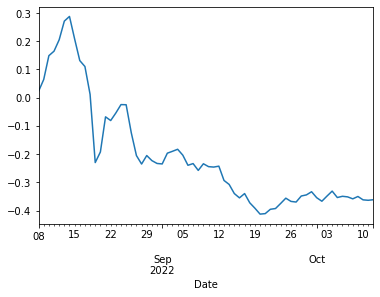

In [43]:
cumulative_returns.plot()

<AxesSubplot:xlabel='Date'>

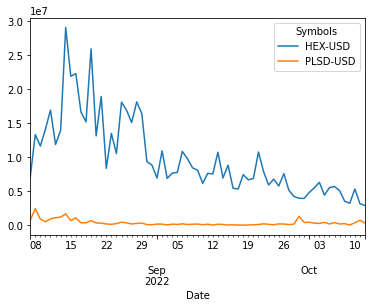

In [44]:
volume_data.plot()